Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from yahoo_fin.stock_info import get_data

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2013,5,1)
end = dt.datetime.now()

base_df = get_data(f'{crypto_currency}-{against_currency}', start, end, index_as_date = True, interval = '1d')
base_df

,open,high,low,close,adjclose,volume,ticker
2014-09-16,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,BTC-USD
2014-09-17,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,BTC-USD
2014-09-18,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,BTC-USD
2014-09-19,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,BTC-USD
2014-09-20,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,BTC-USD
...,...,...,...,...,...,...,...
2021-10-01,48137.468750,48282.062500,47465.496094,47711.488281,47711.488281,3.061435e+10,BTC-USD
2021-10-02,47680.027344,49130.691406,47157.289062,48199.953125,48199.953125,2.663812e+10,BTC-USD
2021-10-03,48208.906250,49456.777344,47045.003906,49112.902344,49112.902344,3.338317e+10,BTC-USD
2021-10-04,49174.960938,51839.984375,49072.839844,51514.812500,51514.812500,3.587390e+10,BTC-USD


In [3]:
base_df['spread'] = base_df.high - base_df.low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2577 entries, 2014-09-16 to 2021-10-05
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      2573 non-null   float64
 1   high      2573 non-null   float64
 2   low       2573 non-null   float64
 3   close     2573 non-null   float64
 4   adjclose  2573 non-null   float64
 5   volume    2573 non-null   float64
 6   ticker    2577 non-null   object 
 7   spread    2573 non-null   float64
dtypes: float64(7), object(1)
memory usage: 181.2+ KB


## Plot the closing value of bitcoin over time

Text(0.5, 1.0, 'Closing price distribution of BTC')

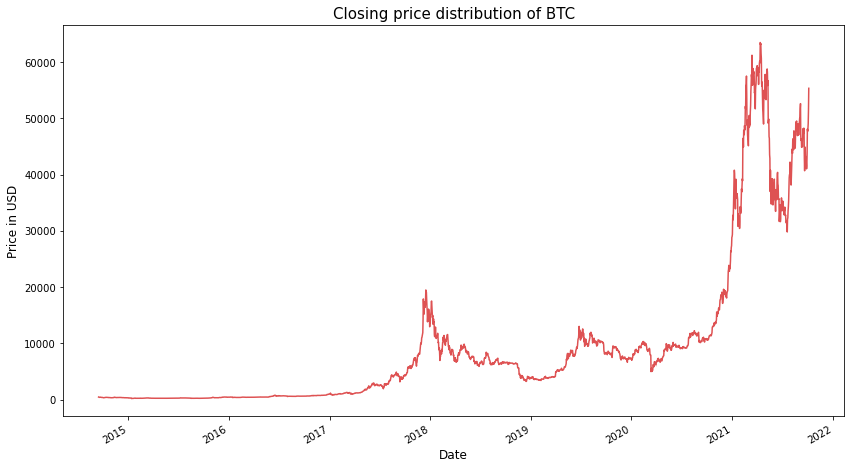

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of BTC", fontsize=15)

Text(0.5, 1.0, 'Daily price spread of BTC')

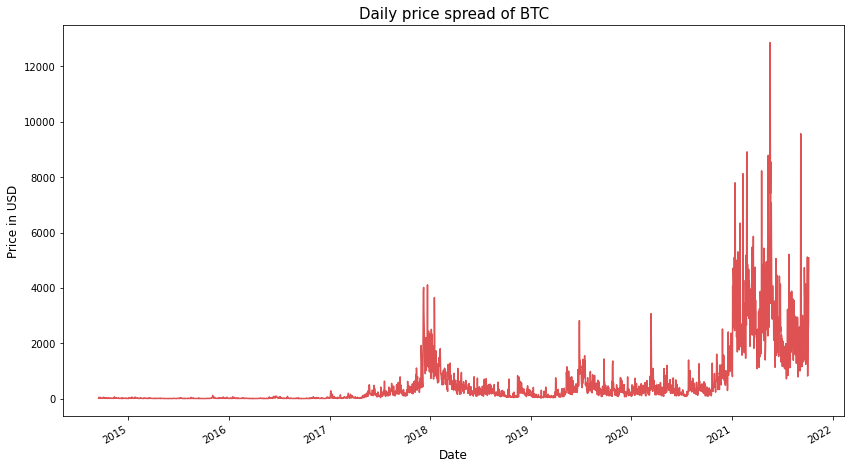

In [5]:
fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.spread.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Daily price spread of BTC", fontsize=15)

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
import mplfinance as mpf

temp_base_df = base_df.copy(deep=False)

temp_base_df = temp_base_df.drop(['spread'], axis=1)
temp_base_df

,open,high,low,close,adjclose,volume,ticker
2014-09-16,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,BTC-USD
2014-09-17,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,BTC-USD
2014-09-18,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,BTC-USD
2014-09-19,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,BTC-USD
2014-09-20,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,BTC-USD
...,...,...,...,...,...,...,...
2021-10-01,48137.468750,48282.062500,47465.496094,47711.488281,47711.488281,3.061435e+10,BTC-USD
2021-10-02,47680.027344,49130.691406,47157.289062,48199.953125,48199.953125,2.663812e+10,BTC-USD
2021-10-03,48208.906250,49456.777344,47045.003906,49112.902344,49112.902344,3.338317e+10,BTC-USD
2021-10-04,49174.960938,51839.984375,49072.839844,51514.812500,51514.812500,3.587390e+10,BTC-USD


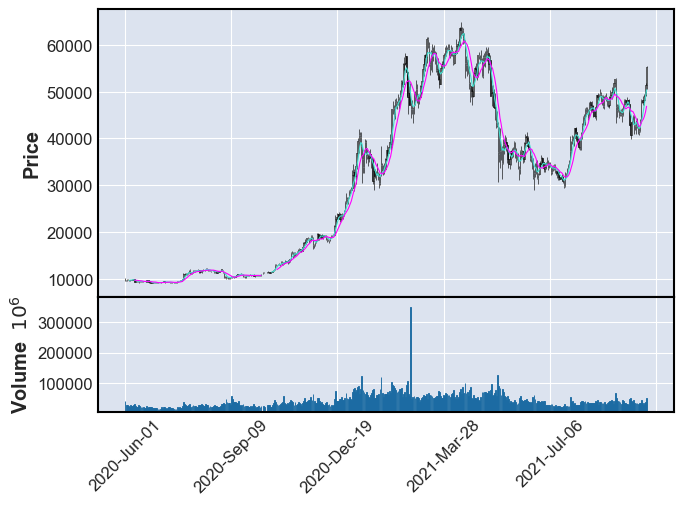

In [7]:
mpf.plot(temp_base_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [8]:
from fbprophet import Prophet

In [9]:
price_predict_df = base_df['close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
#price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
0,2014-09-16,457.334015
1,2014-09-17,424.440002
2,2014-09-18,394.795990
3,2014-09-19,408.903992
4,2014-09-20,398.821014
...,...,...
2572,2021-10-01,47711.488281
2573,2021-10-02,48199.953125
2574,2021-10-03,49112.902344
2575,2021-10-04,51514.812500


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2595,2021-10-31,51284.983026,47367.164442,55233.183903
2596,2021-11-01,51423.283635,47259.159206,55397.140894
2597,2021-11-02,51602.864526,47542.326878,55497.048960
2598,2021-11-03,51788.415221,47569.447051,56400.151450
2599,2021-11-04,51990.278299,48029.152251,55806.736407


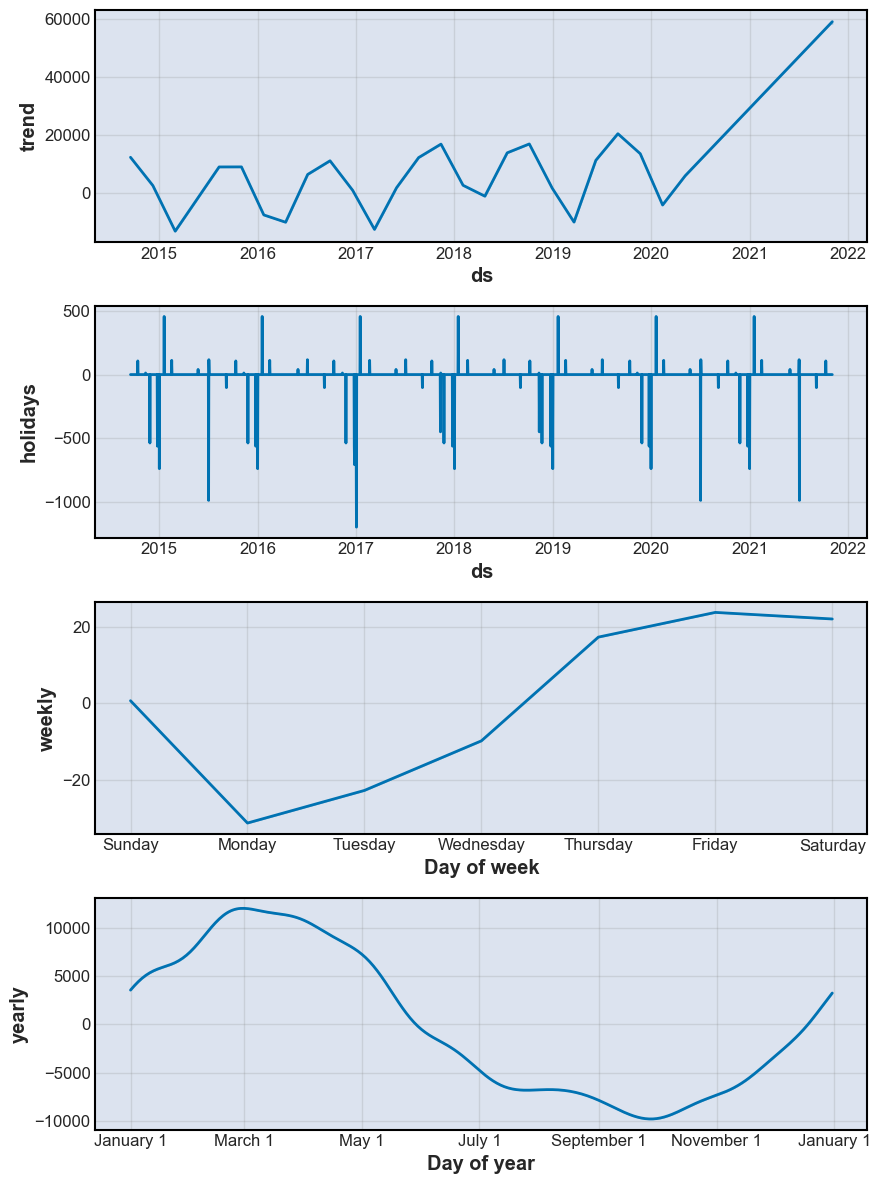

In [10]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
#m.add_country_holidays(country_name='CN')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

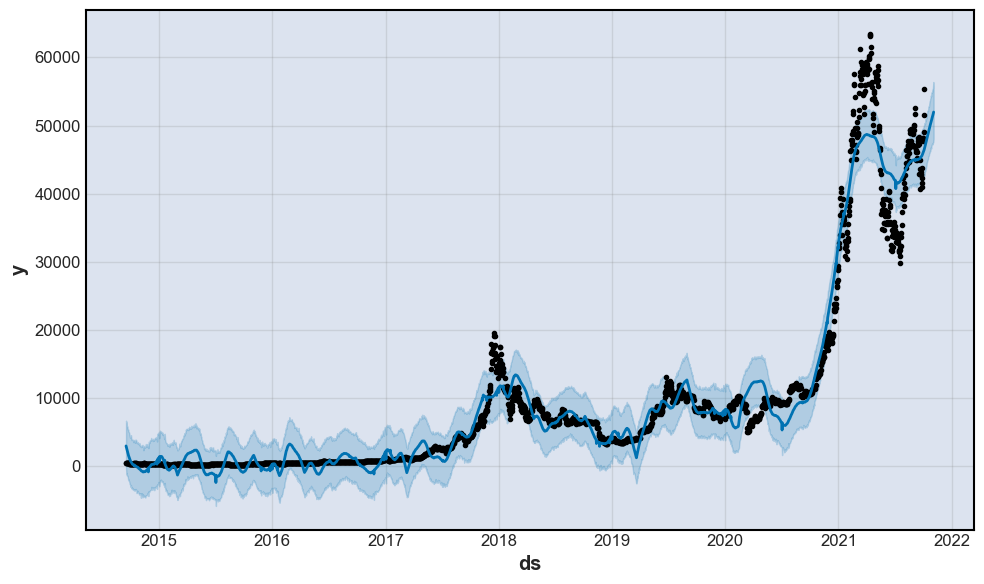

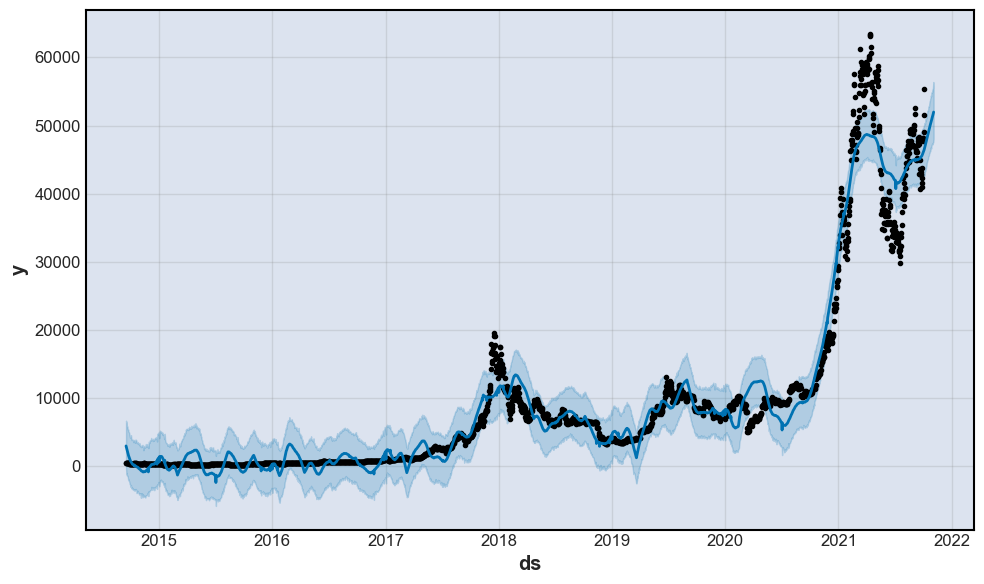

In [11]:
m.plot(forecast)